# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

The goals / steps of this project are the following:
* Load the data set 
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze performance of the model

## Step 0: Load The Data

In [10]:
# Load pickled data
import pickle
import numpy as np

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [11]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import matplotlib.image as mpimg

# Number of training examples
n_train = np.size(y_train)

# Number of validation examples
n_valid = np.size(y_valid)

# Number of testing examples.
n_test = np.size(y_test)

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3:1]

# How many unique classes/labels there are in the dataset.
n_classes = len(set((y_train)))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

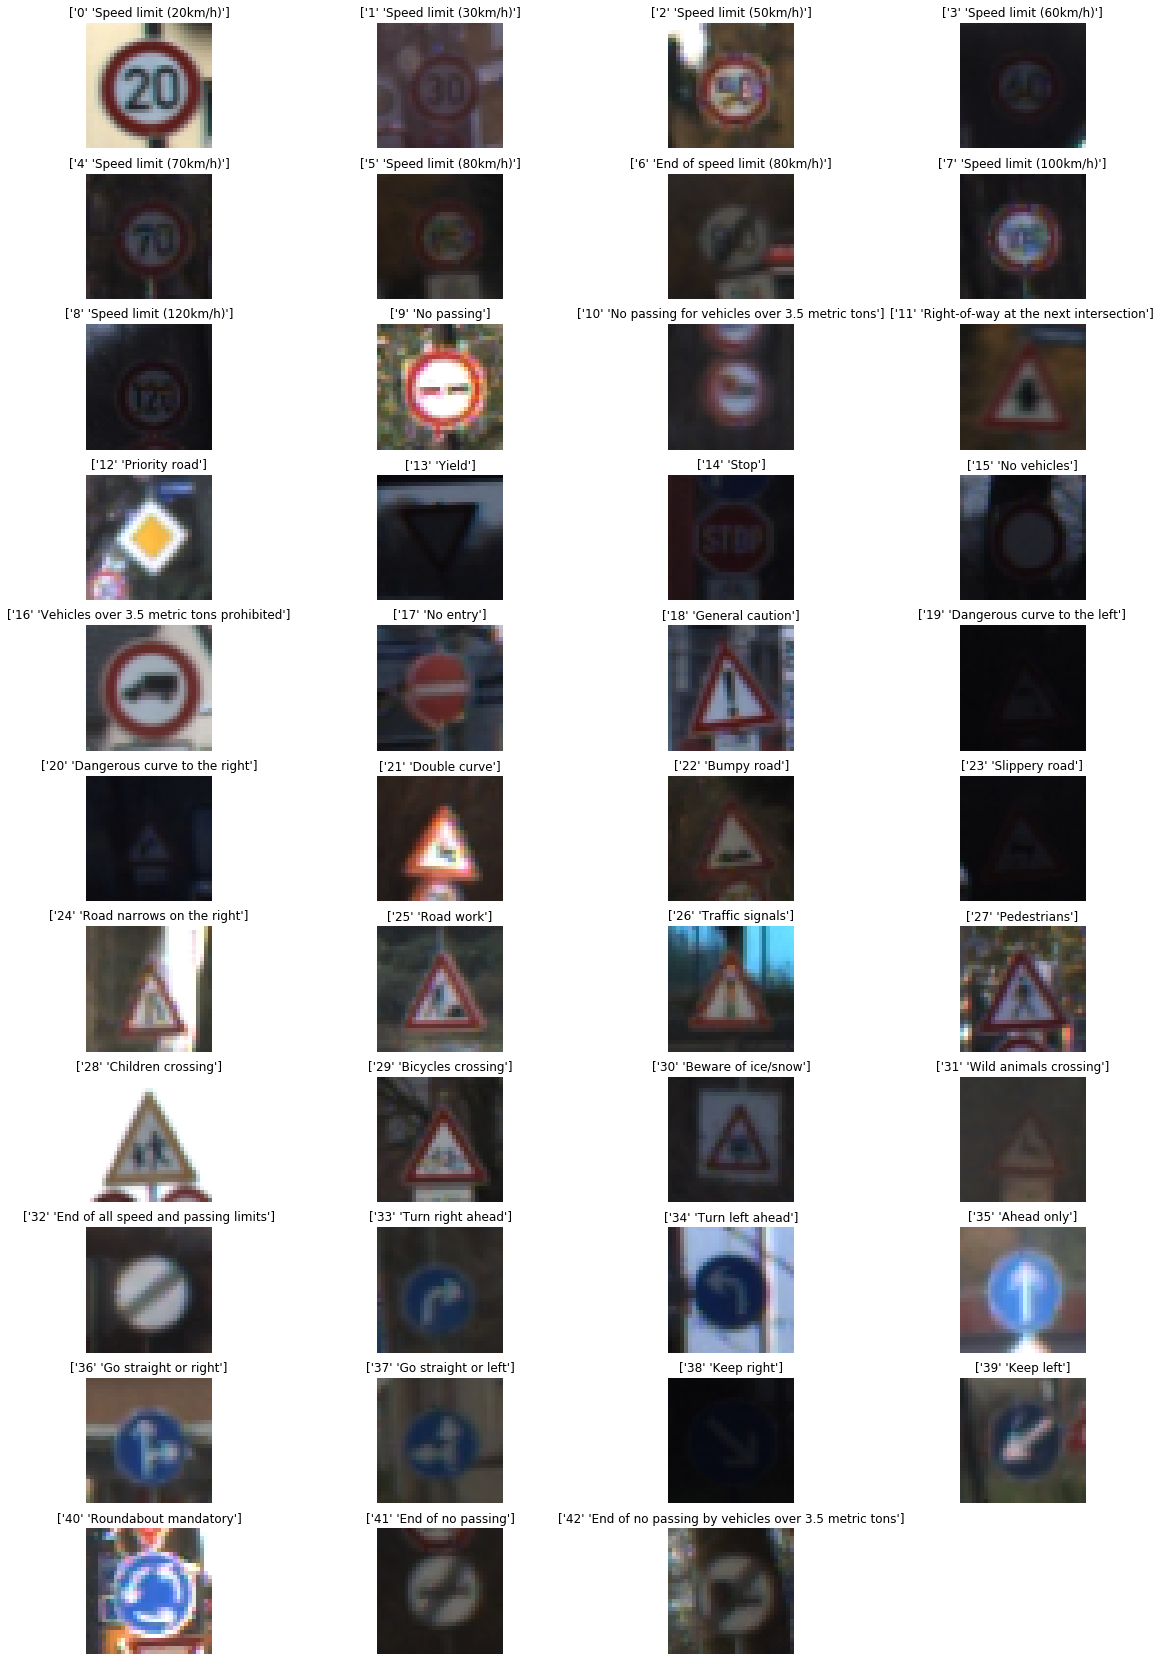

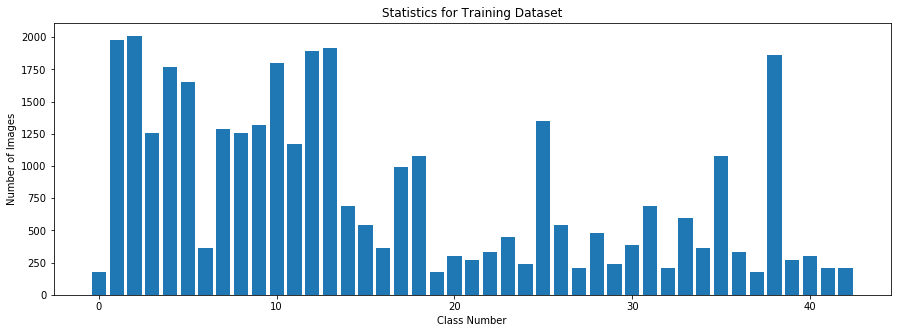

Minimum number of images per class in the training data set= 180
Maximum number of images per class in the training data set= 2010


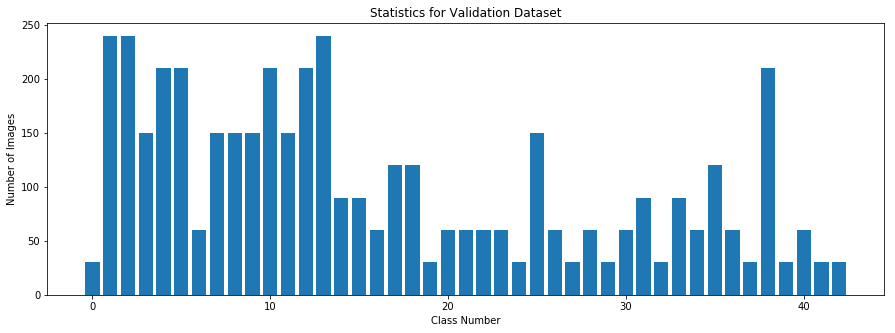

Minimum number of images per class in the validation data set= 30
Maximum number of images per class in the validation data set= 240


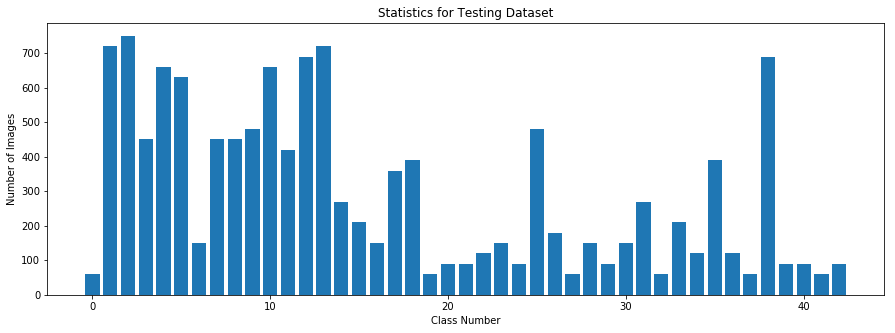

Minimum number of images per class in the testing data set= 60
Maximum number of images per class in the testing data set= 750


In [12]:
### Data exploration visualization
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Reading sign names from the signnames.csv file
signnames = np.genfromtxt('signnames.csv', dtype=str, delimiter=',', skip_header=1) 

# Visualizing the training dataset
train_samples=[]
plt.figure(figsize=(20, 30))
for i in range(0, n_classes):
    plt.subplot(11, 4, i+1)
    class_rep_img = X_train[y_train == i]
    plt.imshow(class_rep_img[1, :, :, :]) #draw the first image of each class
    plt.title(signnames[i])
    plt.axis('off')
    train_samples.append(len(class_rep_img))
plt.show()

# Plotting statistical information for Training Data
plt.figure(figsize=(15, 5))
plt.bar(range(0, n_classes), train_samples)
plt.title("Statistics for Training Dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")
plt.show()

print("Minimum number of images per class in the training data set=", min(train_samples))
print("Maximum number of images per class in the training data set=", max(train_samples))

# Visualizing the validation dataset
valid_samples=[]
for i in range(0, n_classes):
    class_rep_img = X_valid[y_valid == i]
    valid_samples.append(len(class_rep_img))

# Plotting statistical information for Validation Data
plt.figure(figsize=(15, 5))
plt.bar(range(0, n_classes), valid_samples)
plt.title("Statistics for Validation Dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")
plt.show()

print("Minimum number of images per class in the validation data set=", min(valid_samples))
print("Maximum number of images per class in the validation data set=", max(valid_samples))

# Visualizing the testing dataset
test_samples=[]
for i in range(0, n_classes):
    class_rep_img = X_test[y_test == i]
    test_samples.append(len(class_rep_img))
    
# Plotting statistical information for Testing Data
plt.figure(figsize=(15, 5))
plt.bar(range(0, n_classes), test_samples)
plt.title("Statistics for Testing Dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")
plt.show()

print("Minimum number of images per class in the testing data set=", min(test_samples))
print("Maximum number of images per class in the testing data set=", max(test_samples))


## By rotating the images, additional data is generated to compensate for lables with minimal data. 

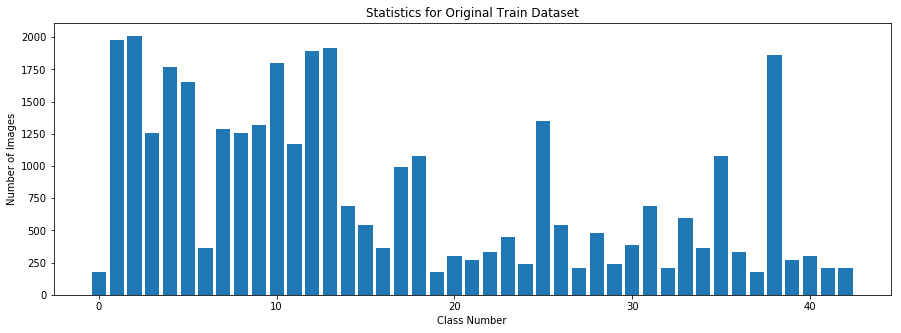

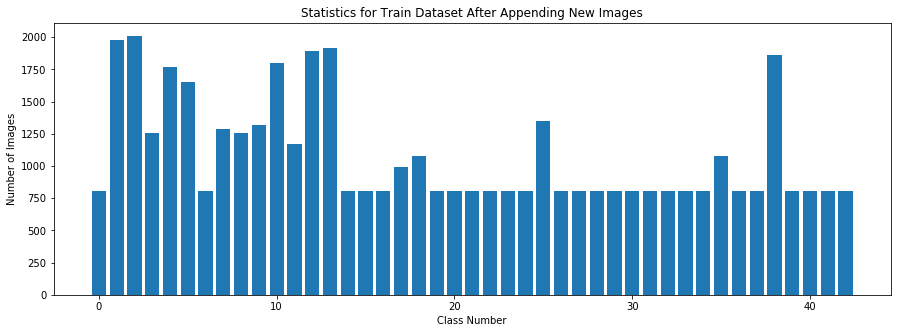

In [13]:
# Generating Additional Data
import random
from scipy import ndimage

X_train_proc = X_train
y_train_proc = y_train

X_valid_proc = X_valid
X_test_proc = X_test

# Roation angles for additional data
rotations = [-20, -15, -10, -5, 5, 10, 15, 20]
num_rotations = len(rotations)

samples_in_class = np.bincount(y_train)
mean_samples = int(np.mean(samples_in_class))
min_samples = int(mean_samples)

for i in range(len(samples_in_class)):
    if samples_in_class[i] < min_samples:
        add_samples = min_samples - samples_in_class[i]
        same_samples = np.where(y_train == i)
        new_train_data = []
        new_lable_data = [] 
        for num in range(add_samples):       
            # Generate new images by rotation and append to lables with insufficient data
            new_train_data.append(ndimage.rotate(X_train[same_samples][random.randint(0,samples_in_class[i] - 1)], random.choice(rotations), reshape=False))
            new_lable_data.append(i)     
        X_train_proc = np.append(X_train_proc, np.array(new_train_data), axis=0)
        y_train_proc = np.append(y_train_proc, np.array(new_lable_data), axis=0)

plt.figure(figsize=(15, 5))
plt.bar(range(0, n_classes), np.bincount(y_train))
plt.title("Statistics for Original Train Dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")
plt.show()

plt.figure(figsize=(15, 5))
plt.bar(range(0, n_classes), np.bincount(y_train_proc))
plt.title("Statistics for Train Dataset After Appending New Images")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Train Image Shape Before Processing = (46714, 32, 32, 3)
Validation Image Shape Before Processing = (4410, 32, 32, 3)
Test Image Shape Before Processing = (12630, 32, 32, 3)

Mean for Train Data Before Processing: 81.0233353923
Mean for Validation Data Before Processing: 83.5564273756
Mean for Test Data Before Processing: 82.1484603612

Images Converted to Gray.

Images Normalized.

Train Image Shape After Normalizing = (46714, 32, 32, 1)
Validation Image Shape After Processing = (4410, 32, 32, 1)
Test Image Shape After Processing = (12630, 32, 32, 1)

Mean for Train Data After Processing: -0.373196943822
Mean for Validation Data After Processing: -0.353489169512
Mean for Test Data After Processing: -0.365019658588


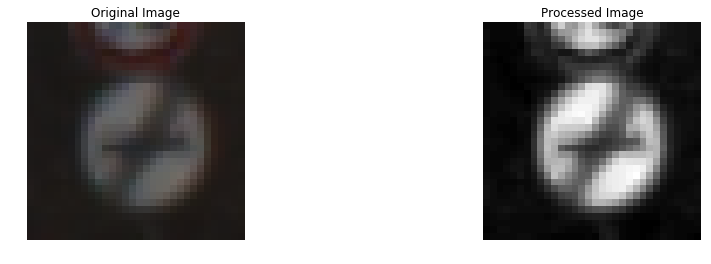

In [14]:
### Preprocessing data: converting to grayscale, normalizing, and visualizing the result
import cv2
from numpy import newaxis

# Grayscales an image
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img

# Normalizes the data between -1 and 1 instead of 0 to 255    
def normalize(dataset):
    return ((dataset-128.) / 128)

# Iterates through grayscale for each image in the data
def color2gray(dataset):
    gray_images = []
    for image in dataset:
        gray = grayscale(image)
        gray_images.append(gray)
    return np.array(gray_images)

print('Train Image Shape Before Processing =',X_train_proc.shape)
print('Validation Image Shape Before Processing =',X_valid_proc.shape)
print('Test Image Shape Before Processing =',X_test_proc.shape)

print()
print("Mean for Train Data Before Processing:",np.mean(X_train_proc))
print("Mean for Validation Data Before Processing:",np.mean(X_valid_proc)) 
print("Mean for Test Data Before Processing:",np.mean(X_test_proc)) 

if X_train_proc.shape[3]==3:
    X_valid_proc = X_valid
    X_test_proc = X_test
    X_train_proc = color2gray(X_train_proc)
    X_train_proc = X_train_proc[..., newaxis]
    X_valid_proc = color2gray(X_valid_proc)
    X_valid_proc = X_valid_proc[..., newaxis]
    X_test_proc = color2gray(X_test_proc)
    X_test_proc = X_test_proc[..., newaxis]
    print()
    print("Images Converted to Gray.")
    
    X_train_proc = normalize(X_train_proc)
    X_valid_proc = normalize(X_valid_proc) 
    X_test_proc = normalize(X_test_proc)
    print()
    print("Images Normalized.")
    
print()
print('Train Image Shape After Normalizing =',X_train_proc.shape)
print('Validation Image Shape After Processing =',X_valid_proc.shape)
print('Test Image Shape After Processing =',X_test_proc.shape)

print()
print("Mean for Train Data After Processing:",np.mean(X_train_proc))
print("Mean for Validation Data After Processing:",np.mean(X_valid_proc)) 
print("Mean for Test Data After Processing:",np.mean(X_test_proc)) 


fig, axs = plt.subplots(1,2, figsize=(15, 4))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('Original Image')
axs[0].imshow(X_train[0].squeeze())

axs[1].axis('off')
axs[1].set_title('Processed Image')
axs[1].imshow(X_train_proc[0].squeeze(), cmap='gray')


### Model Architecture

In [15]:
### CNN Model architecture is defined here.

import tensorflow as tf
from tensorflow.contrib.layers import flatten
keep_prob = tf.placeholder(tf.float32)

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.001
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x8
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 8), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(8))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # SOLUTION: Layer 2: Convolutional. Input = 30x30x8. Output = 24x24x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(7, 7, 8, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation
    conv2 = tf.nn.relu(conv2)
    # SOLUTION: Pooling. Input = 24x24x16. Output = 12x12x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    

    # SOLUTION: Layer 3: Convolutional. Input = 12x12x16. Output = 10x10x25.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 25), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(25))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b

    # SOLUTION: Activation
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.dropout(conv3, keep_prob)

    # SOLUTION: Flatten. Input = 10x10x25. Output = 2500.
    fc0   = flatten(conv3)

    # SOLUTION: Layer 4: Fully Connected. Input = 2500. Output = 500.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2500, 500), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(500))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 500. Output = 100.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(500, 100), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(100))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation
    fc2    = tf.nn.relu(fc2)
    
    # SOLUTION: Layer 6: Fully Connected. Input = 100. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [17]:
### Training the model here.
### Calculating and reporting the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set will be calculated and reported as well.

EPOCHS = 100
BATCH_SIZE = 200
from sklearn.utils import shuffle

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
rate = tf.placeholder(tf.float32)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy, total_loss = 0, 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_accuracy / num_examples, total_loss / num_examples

loss_hist_train, loss_hist_valid  = [], []
train_accuracy_history, valid_accuracy_history  = [], []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_proc)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_proc, y_train_proc = shuffle(X_train_proc, y_train_proc)
        learnrate = 0.001 * pow(0.99,i)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_proc[offset:end], y_train_proc[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.4, rate:learnrate})
            
        training_accuracy = evaluate(X_train_proc, y_train_proc)
        validation_accuracy = evaluate(X_valid_proc, y_valid)

        train_accuracy, train_loss = evaluate (X_train_proc, y_train_proc)
        train_accuracy_history.append(train_accuracy)
        loss_hist_train.append(train_loss)
        
        valid_accuracy, valid_loss = evaluate(X_valid_proc, y_valid)
        loss_hist_valid.append(valid_loss)
        valid_accuracy_history.append(valid_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy    = {:.4f}".format(train_accuracy), "  &   Training Loss   = {:.4f}".format(train_loss))
        print("Validation Accuracy  = {:.4f}".format(valid_accuracy), "  &   Validation Loss = {:.4f}".format(valid_loss))
        print()
           
    saver.save(sess, './TrafficSignLenet')
    print("Model Saved")

Training...

EPOCH 1 ...
Training Accuracy    = 0.0559   &   Training Loss   = 3.6008
Validation Accuracy  = 0.0601   &   Validation Loss = 3.5734

EPOCH 2 ...
Training Accuracy    = 0.2413   &   Training Loss   = 2.5614
Validation Accuracy  = 0.2297   &   Validation Loss = 2.5185

EPOCH 3 ...
Training Accuracy    = 0.5742   &   Training Loss   = 1.4882
Validation Accuracy  = 0.5447   &   Validation Loss = 1.5198

EPOCH 4 ...
Training Accuracy    = 0.6606   &   Training Loss   = 1.1558
Validation Accuracy  = 0.6515   &   Validation Loss = 1.1842

EPOCH 5 ...
Training Accuracy    = 0.7203   &   Training Loss   = 0.9550
Validation Accuracy  = 0.7057   &   Validation Loss = 1.0072

EPOCH 6 ...
Training Accuracy    = 0.7918   &   Training Loss   = 0.7425
Validation Accuracy  = 0.7635   &   Validation Loss = 0.7871

EPOCH 7 ...
Training Accuracy    = 0.8199   &   Training Loss   = 0.6431
Validation Accuracy  = 0.7782   &   Validation Loss = 0.7111

EPOCH 8 ...
Training Accuracy    = 0.8209 

EPOCH 62 ...
Training Accuracy    = 0.9873   &   Training Loss   = 0.0646
Validation Accuracy  = 0.9508   &   Validation Loss = 0.1704

EPOCH 63 ...
Training Accuracy    = 0.9878   &   Training Loss   = 0.0629
Validation Accuracy  = 0.9488   &   Validation Loss = 0.1694

EPOCH 64 ...
Training Accuracy    = 0.9851   &   Training Loss   = 0.0674
Validation Accuracy  = 0.9483   &   Validation Loss = 0.1755

EPOCH 65 ...
Training Accuracy    = 0.9885   &   Training Loss   = 0.0586
Validation Accuracy  = 0.9528   &   Validation Loss = 0.1685

EPOCH 66 ...
Training Accuracy    = 0.9877   &   Training Loss   = 0.0588
Validation Accuracy  = 0.9494   &   Validation Loss = 0.1769

EPOCH 67 ...
Training Accuracy    = 0.9884   &   Training Loss   = 0.0572
Validation Accuracy  = 0.9526   &   Validation Loss = 0.1694

EPOCH 68 ...
Training Accuracy    = 0.9881   &   Training Loss   = 0.0591
Validation Accuracy  = 0.9499   &   Validation Loss = 0.1778

EPOCH 69 ...
Training Accuracy    = 0.9872   &  

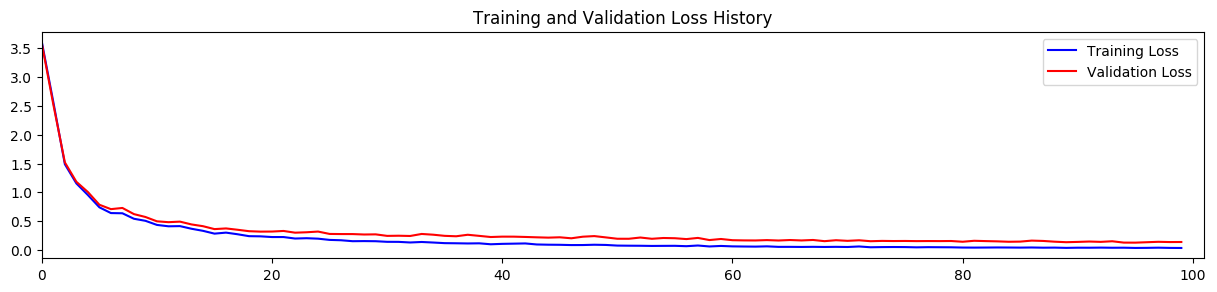

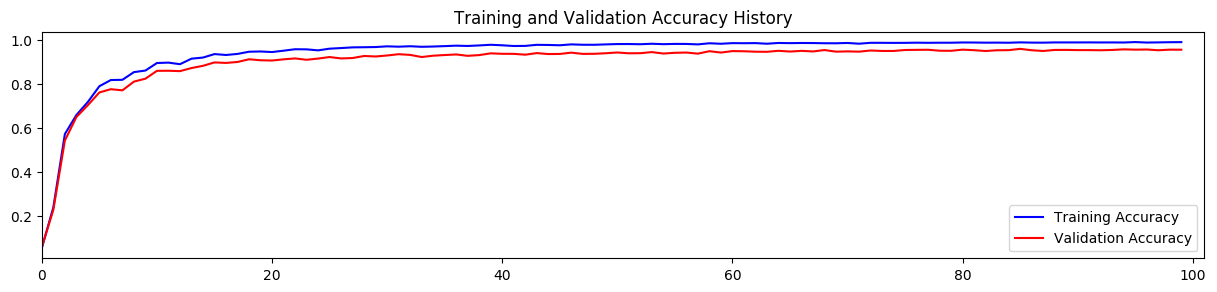

In [18]:
# Plotting loss and accuracy history for trainin and validation
plt.figure(figsize=(15, 3), dpi=100)
lossplt = plt.subplot(1,1,1)
lossplt.set_title('Training and Validation Loss History')
lossplt.plot(loss_hist_train, 'b', label='Training Loss')
lossplt.plot(loss_hist_valid, 'r', label='Validation Loss')
lossplt.set_xlim([0, EPOCHS+1])
lossplt.legend(loc=1)

print()
plt.figure(figsize=(15, 3), dpi=100)
accuracyplt = plt.subplot(1,1,1)
accuracyplt.set_title('Training and Validation Accuracy History')
accuracyplt.plot(train_accuracy_history, 'b', label='Training Accuracy')
accuracyplt.plot(valid_accuracy_history, 'r', label='Validation Accuracy')
accuracyplt.set_xlim([0, EPOCHS+1])
accuracyplt.legend(loc=4)

In [65]:
from sklearn.metrics import confusion_matrix
import itertools

def predict(X_data):
    num_examples = len(X_data)
    predict_output = np.zeros((num_examples, 43))
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        predict_output[offset:(offset+BATCH_SIZE),:] = sess.run(tf.nn.softmax(logits), feed_dict = {x: batch_x, keep_prob:1.0})
    return predict_output

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy, test_loss = evaluate(X_test_proc, y_test)
    prediction_train = predict(X_train_proc)
    prediction_valid = predict(X_valid_proc)
    prediction_test  = predict(X_test_proc)  
    one_pred_train   = np.argmax(prediction_train, axis=1)
    one_pred_valid   = np.argmax(prediction_valid, axis=1)
    one_pred_test    = np.argmax(prediction_test, axis=1)
    
print()    
print("Training Accuracy = {:.3f}".format(train_accuracy))
print("Validation Accuracy = {:.3f}".format(valid_accuracy))
print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\TrafficSignLenet

Training Accuracy = 0.992
Validation Accuracy = 0.958
Test Accuracy = 0.942


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

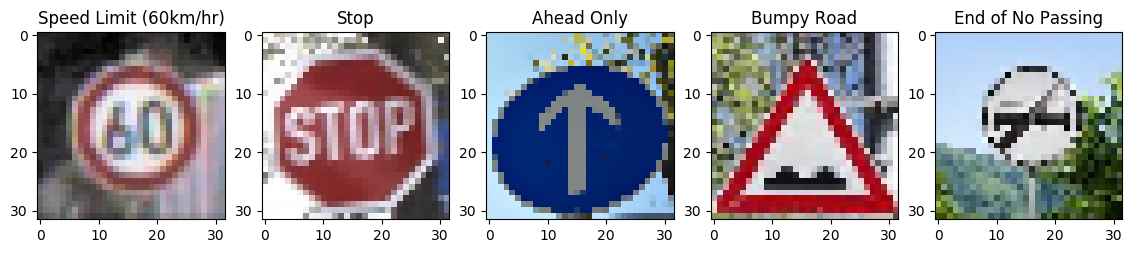

In [81]:
### Loading the images and plotting them here.

Test_Image_1 = mpimg.imread('New_Images/TestSpeedLimit60kph.jpg')
Test_Image_1 = cv2.resize(Test_Image_1,(32, 32))

Test_Image_2 = mpimg.imread('New_Images/TestStop.jpg')
Test_Image_2 = cv2.resize(Test_Image_2,(32, 32))

Test_Image_3 = mpimg.imread('New_Images/TestAheadOnly.jpg')
Test_Image_3 = cv2.resize(Test_Image_3,(32, 32))

Test_Image_4 = mpimg.imread('New_Images/TestBumpyRoad.jpg')
Test_Image_4 = cv2.resize(Test_Image_4,(32, 32))

Test_Image_5 = mpimg.imread('New_Images/TestEndOfNoPassing.jpg')
Test_Image_5 = cv2.resize(Test_Image_5,(32, 32))

plt.figure(figsize=(14, 4), dpi=100)

plt.subplot(1,5,1)
plt.title('Speed Limit (60km/hr)')
plt.imshow(Test_Image_1)

plt.subplot(1,5,2)
plt.title('Stop')
plt.imshow(Test_Image_2)

plt.subplot(1,5,3)
plt.title('Ahead Only')
plt.imshow(Test_Image_3)

plt.subplot(1,5,4)
plt.title('Bumpy Road')
plt.imshow(Test_Image_4)

plt.subplot(1,5,5)
plt.title('End of No Passing')         
plt.imshow(Test_Image_5)
plt.show

test_images = np.array([Test_Image_1,Test_Image_2,Test_Image_3,Test_Image_4,Test_Image_5])
actual_labels = np.array([  3,  14,  35,  22,   41])

### Predict the Sign Type for Each Image

In [82]:
### Running the predictions here and use the model to output the prediction for each image.
### Pre-processing the images with the same pre-processing pipeline used earlier.

X_test_new = np.zeros((5,32,32,3))

X_test_new[0,:,:,:] = Test_Image_1
X_test_new[1,:,:,:] = Test_Image_2
X_test_new[2,:,:,:] = Test_Image_3
X_test_new[3,:,:,:] = Test_Image_4
X_test_new[4,:,:,:] = Test_Image_5

X_test_new_proc = X_test_new

print()
print('Test Image Shape Before Processing =',X_test_new.shape)
print("Mean for Test Data After Processing:",np.mean(X_test_new)) 

X_test_new_proc_1 = grayscale(Test_Image_1)
X_test_new_proc_2 = grayscale(Test_Image_2)
X_test_new_proc_3 = grayscale(Test_Image_3)
X_test_new_proc_4 = grayscale(Test_Image_4)
X_test_new_proc_5 = grayscale(Test_Image_5)

print()
print("Images Converted to Gray.")

X_test_new_proc = np.zeros((5,32,32))
X_test_new_proc[0,:,:] = X_test_new_proc_1
X_test_new_proc[1,:,:] = X_test_new_proc_2
X_test_new_proc[2,:,:] = X_test_new_proc_3
X_test_new_proc[3,:,:] = X_test_new_proc_4
X_test_new_proc[4,:,:] = X_test_new_proc_5

X_test_new_proc = X_test_new_proc[..., newaxis]
X_test_new_proc_n = normalize(X_test_new_proc)

print("Images Normalized.")
print()

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction = predict(X_test_new_proc_n)
    Top_predictions = sess.run(tf.nn.top_k(prediction, k=5))
    Top_Values = Top_predictions[0]
    Top_labels = Top_predictions[1]


Test Image Shape Before Processing = (5, 32, 32, 3)
Mean for Test Data After Processing: 128.174479167

Images Converted to Gray.
Images Normalized.

INFO:tensorflow:Restoring parameters from .\TrafficSignLenet


### Analyze Performance

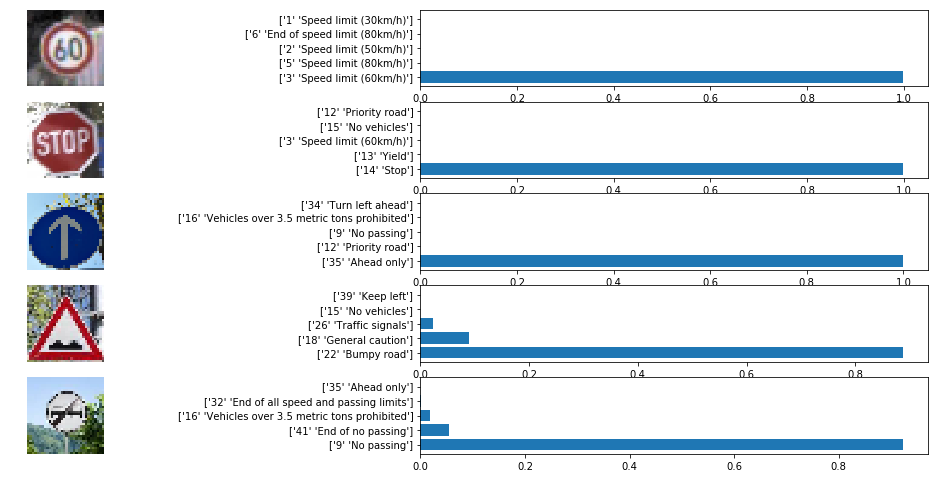

Model Accuracy on the 5 New Images = 80.0 %


In [93]:
### Calculating the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

top_prediction = np.zeros(len(test_images))
plt.figure(figsize=(20, 20))
for i in range(5):
    plt.subplot(12, 2, 2*i+1)
    plt.imshow(test_images[i]) 
    plt.axis('off')
    plt.subplot(12, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), Top_Values[i])
    top_prediction[i] = Top_labels[Top_Values == np.max(Top_Values[i])]
    labs=[signnames[j] for j in Top_labels[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()

model_accuracy = 1 - (np.count_nonzero(top_prediction - actual_labels)) / len(test_images) 

print("Model Accuracy on the 5 New Images =", model_accuracy*100, "%")

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.